In [1]:
# 引入Python包，在jupyter notebook 运行后可以直接输出多个变量 注意大小写
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

# 指定gpu设备
import os
os.environ['CUDA_VISIBLE_DEVICES'] ="0" # gpu
# os.environ["CUDA_VISIBLE_DEVICES"] = "-1" # cpu

In [2]:
from keras.applications import VGG16

Using TensorFlow backend.


In [3]:
type(VGG16)

function

In [4]:
model = VGG16(weights='imagenet', include_top=False, input_shape=(150, 150, 3))

In [5]:
model.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 150, 150, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 150, 150, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 150, 150, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 75, 75, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 75, 75, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 75, 75, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 37, 37, 128)       0     

In [6]:
print('This is the number of trainable weights ' 
         'before freezing the conv base:', len(model.trainable_weights))

This is the number of trainable weights before freezing the conv base: 26


In [7]:
import numpy as np
from keras.preprocessing.image import ImageDataGenerator

base_dir = 'kaggle-dogs-vs-cats/cats_and_dogs_small'
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')
test_dir = os.path.join(base_dir, 'test')

datagen = ImageDataGenerator(rescale=1./255)
batch_size = 20

In [14]:
from keras import models
from keras import layers
from keras import optimizers

dense_model = models.Sequential()
dense_model.add(model) # 添加vgg16
dense_model.add(layers.Flatten())
dense_model.add(layers.Dense(256, activation='relu'))
dense_model.add(layers.Dense(1, activation='sigmoid'))


In [15]:
dense_model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Model)                (None, 4, 4, 512)         14714688  
_________________________________________________________________
flatten_4 (Flatten)          (None, 8192)              0         
_________________________________________________________________
dense_6 (Dense)              (None, 256)               2097408   
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 257       
Total params: 16,812,353
Trainable params: 16,812,353
Non-trainable params: 0
_________________________________________________________________


In [16]:
print('This is the number of trainable weights ' 
         'before freezing the conv base:', len(dense_model.trainable_weights))

This is the number of trainable weights before freezing the conv base: 30


In [17]:
model.trainable = False
print('This is the number of trainable weights ' 
          'after freezing the conv base:', len(dense_model.trainable_weights))

This is the number of trainable weights after freezing the conv base: 4


In [18]:
dense_model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Model)                (None, 4, 4, 512)         14714688  
_________________________________________________________________
flatten_4 (Flatten)          (None, 8192)              0         
_________________________________________________________________
dense_6 (Dense)              (None, 256)               2097408   
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 257       
Total params: 16,812,353
Trainable params: 2,097,665
Non-trainable params: 14,714,688
_________________________________________________________________


In [11]:
from keras.preprocessing.image import ImageDataGenerator,load_img,img_to_array,array_to_img

train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest')

test_datagen = ImageDataGenerator(rescale=1./255) # 验证数据不能增强

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),
    batch_size=20,
    class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
    validation_dir,
    target_size=(150, 150),
    batch_size=20,
    class_mode='binary')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [13]:
# 编译器要在设置 model.trainable = False 之后再配置
dense_model.compile(optimizer=optimizers.RMSprop(lr=2e-5),
                   loss='binary_crossentropy',
                   metrics=['acc'])

history = dense_model.fit_generator(train_generator,
                                    steps_per_epoch=100,
                                    epochs=30,
                                    validation_data=validation_generator,
                                    validation_steps=50)

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where

Epoch 1/30
100/100 [==============================] - 140s 1s/step - loss: 0.5790 - acc: 0.7040 - val_loss: 0.4430 - val_acc: 0.8140
Epoch 2/30
100/100 [==============================] - 66s 658ms/step - loss: 0.4733 - acc: 0.7835 - val_loss: 0.4033 - val_acc: 0.8520
Epoch 3/30
100/100 [==============================] - 80s 795ms/step - loss: 0.4314 - acc: 0.8185 - val_loss: 0.3944 - val_acc: 0.8630
Epoch 4/30
100/100 [==============================] - 84s 841ms/step - loss: 0.4165 - acc: 0.8135 - val_loss: 0.2421 - val_acc: 0.8790
Epoch 5/30
100/100 [==============================] - 76s 759ms/step - loss: 0.3945 - acc: 0.8190 - val_loss: 0.1622 - val_acc: 0.8840
Epoch 6/30
100/100 [==============================] - 77s 770ms/step - loss: 0.3716 - acc: 0.8450 - val_loss: 0.1470 - val_acc: 0.8840
Epoch 7/30
100/100 [==============================] - 79s 791ms/step - loss: 0.3585 - acc: 0.8395

In [19]:
history = dense_model.fit_generator(train_generator,
                                    steps_per_epoch=100,
                                    epochs=30,
                                    validation_data=validation_generator,
                                    validation_steps=50)

NameError: name 'train_generator' is not defined

In [18]:
test_generator = test_datagen.flow_from_directory( 
        test_dir, 
        target_size=(150, 150), 
        batch_size=20, 
        class_mode='binary')
dense_model.evaluate_generator(test_generator, steps=50)

Found 1000 images belonging to 2 classes.


[0.24859976768493652, 0.8920000195503235]

Text(0.5, 1.0, 'Training and validation accuracy')

<Figure size 432x288 with 0 Axes>

Text(0.5, 1.0, 'Training and validation loss')

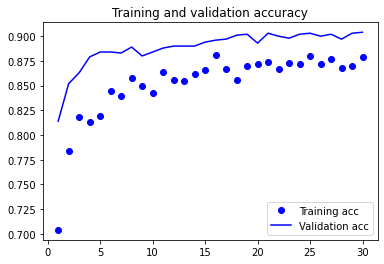

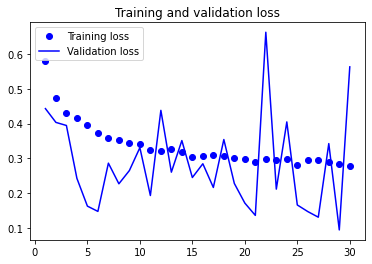

In [15]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1) 
 
plt.plot(epochs, acc, 'bo', label='Training acc') 
plt.plot(epochs, val_acc, 'b', label='Validation acc') 
plt.title('Training and validation accuracy') 
plt.legend() 
 
plt.figure() 
 
plt.plot(epochs, loss, 'bo', label='Training loss') 
plt.plot(epochs, val_loss, 'b', label='Validation loss') 
plt.title('Training and validation loss') 
plt.legend()

In [16]:
dense_model.save('cats_and_dogs_small_vgg16_02.h5')

In [19]:
max(history.history['val_acc'])

0.9039999842643738